In [5]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
expdir = "/homes_unix/jlegrand/data/Memento/output/prediction"
exppath = Path(expdir) / "k-3_feat-series_experimental-True_atlas-schaefer200_winsize-48_batchsize-512_niter-50_stamp-2024-07-12-09:44"

cv_results = pd.read_csv(Path(exppath) / "cv_results.csv", index_col=0)

In [6]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_module__channel_func,param_module__num_conv_blocks,param_optimizer__lr,param_optimizer__weight_decay,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,40.727320,8.396599,0.549203,0.326396,<function fast_increase at 0x76865e347d80>,2,0.000103,0.003136,OrderedDict({'module__channel_func': 'fast_inc...,0.417512,0.340483,0.364255,0.384115,0.349742,0.371222,0.027437,1
16,37.662746,11.887186,0.534784,0.319024,<function constant_channels at 0x76865e347ec0>,1,0.000075,0.006539,OrderedDict({'module__channel_func': <function...,0.401998,0.336162,0.425750,0.338675,0.342537,0.369024,0.037437,2
48,25.172240,5.097689,0.428042,0.233984,<function fast_increase at 0x76865e347d80>,1,0.000101,0.012297,OrderedDict({'module__channel_func': <function...,0.365592,0.332420,0.377202,0.329633,0.371143,0.355198,0.020094,3
35,65.114507,8.226909,0.413703,0.182631,<function fast_increase at 0x76865e347d80>,1,0.000018,0.000144,OrderedDict({'module__channel_func': <function...,0.396975,0.310211,0.389105,0.316203,0.362271,0.354953,0.036025,4
36,27.285336,5.897257,0.440437,0.243478,<function default_channel_func at 0x76865e347e20>,2,0.000201,0.018472,OrderedDict({'module__channel_func': <function...,0.392828,0.327276,0.355993,0.330220,0.357778,0.352819,0.023658,5
30,125.216618,39.574723,0.502690,0.279523,<function default_channel_func at 0x76865e347e20>,4,0.000084,0.100000,OrderedDict({'module__channel_func': <function...,0.367252,0.344504,0.340663,0.338906,0.368012,0.351867,0.013001,6
6,23.917913,3.771044,0.439648,0.219145,<function constant_channels at 0x76865e347ec0>,3,0.000122,0.000191,OrderedDict({'module__channel_func': <function...,0.340953,0.293222,0.399842,0.341506,0.378776,0.350860,0.036569,7
15,48.253542,19.491915,0.429170,0.220788,<function initial_bump at 0x76865e7e9620>,2,0.000460,0.000015,OrderedDict({'module__channel_func': <function...,0.347831,0.368825,0.371071,0.316674,0.348915,0.350663,0.019559,8
27,40.550726,13.129152,0.528934,0.268191,<function slow_increase at 0x76865e347ce0>,1,0.000107,0.019932,OrderedDict({'module__channel_func': <function...,0.343602,0.314309,0.378484,0.339858,0.370380,0.349327,0.022987,9
28,70.775633,48.348454,0.652995,0.311638,<function slow_increase at 0x76865e347ce0>,5,0.100000,0.000043,OrderedDict({'module__channel_func': <function...,0.323995,0.359245,0.395345,0.343367,0.320697,0.348530,0.027239,10


Batch size is not so important, set around 200?


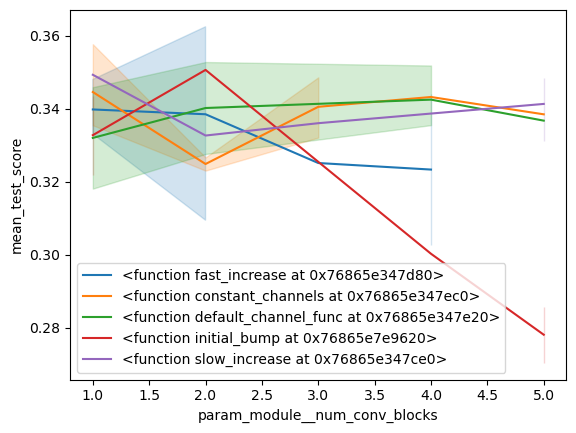

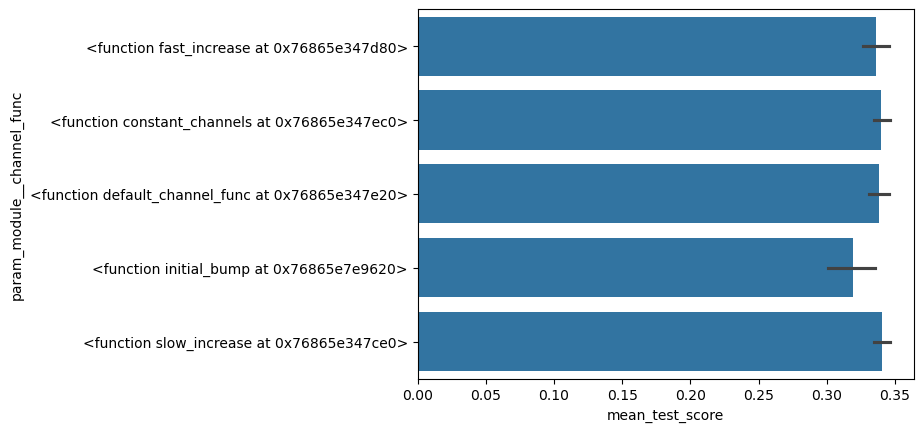

In [7]:
import seaborn as sns
sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score", hue="param_module__channel_func")
plt.legend(loc="lower left")
plt.show()
sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
plt.show()

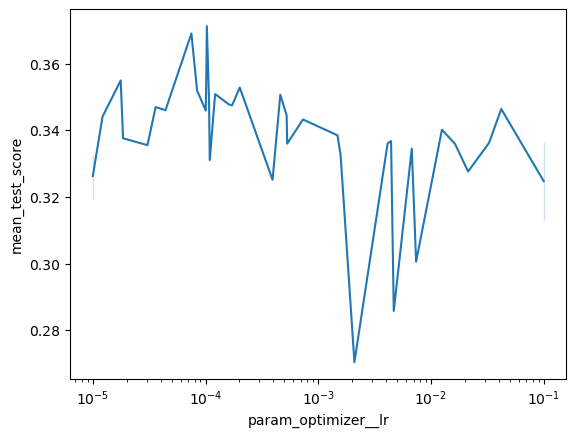

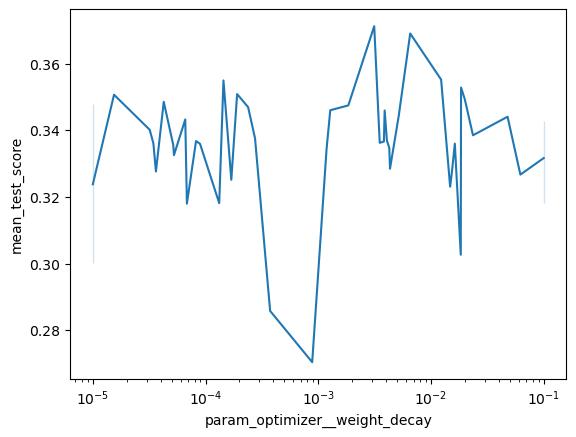

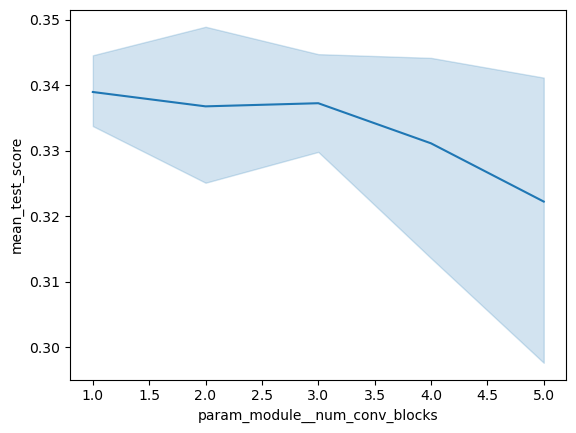

In [8]:
#sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
#plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__lr", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__weight_decay", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score")
plt.show()